#  Анализ на качеството на млякото

## Стефани Циркалова, 2201321083, Софтуерно инженерство, 2 курс

### Източник: https://www.kaggle.com/datasets/cpluzshrijayan/milkquality

## Въведение
В този проект ще разгледаме данни за качеството на прясното мляко и ще изведем съответните изводи. Ще бъдат разгледани аспекти като състав, микробиологична чистота, следене на хранителни вещества и химичен състав. Като резултат от този анализ, ще се получи по-добро разбиране на тенденциите в качеството на млякото. Това е от съществено значение не само за бизнеса, но и за крайните потребители, които зависят от високото качество на млякото за поддържане на здравословен начин на живот.

## Съдържание:
Този набор от данни съдържа следните показатели:
   - pH нива: определя PH(баланс на киселинност и алкалност) стойността на млякото, която варира от 3 до 9,5 макс.
   - Температура: определя температурата на млякото, която варира от 34'C до 90'C.
   - Вкус: определя вкуса на млякото, което е категорична информация 0 (лошо) или 1 (добро) макс.
   - Мирис: определя миризмата на млякото, която е категорична информация 0 (лошо) или 1 (добро) макс.
   - Мазнини: определя мазнините в млякото, които са категорични данни 0 (Ниско) или 1 (Високо) макс.
   - Мътност: определя мътността на млякото, която е категорична информация 0 (ниска) или 1 (висока) макс.
   - Цвят: определя цвета на млякото, който варира от 240 до 255.
   - Оценка: определя степента на млякото, която е категорична информация, където Ниска (Лоша), Средна (Умерена), Висока (Добра)

In [1]:
#Първо импортираме необходимите библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, ConfusionMatrixDisplay,mean_squared_error, r2_score

## Получаване на данни
### Прочитаме файла milknew.csv чрез pandas и го задаваме в рамка от данни, наречена милк_quality.

In [2]:
milk_quality = pd.read_csv('milknew.csv')

## Проверяваме информацията за milk_quality

In [3]:
milk_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


### Можем да видим, че нямаме нулеви стойности. Интересно е, че характеристиките Температура, Вкус, Мирис, Мазнини, Мътност и Цвят в набора от данни са цели числа, така че не е нужно да ги трансформираме.

## Проверяваме първите пет реда 

In [4]:
milk_quality.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


## Използваме метода describe(), за да разкрием описателната статистика за набора от данни. 

### Това ще ни даде съществена статистическа информация за цифровите колони, представяйки подробности като средни стойности, стандартни отклонения и минимални и максимални стойности.


In [5]:
milk_quality.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


### Проверяваме набора от данни за нулеви стойности

In [6]:
milk_quality.isnull()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
1054,False,False,False,False,False,False,False,False
1055,False,False,False,False,False,False,False,False
1056,False,False,False,False,False,False,False,False
1057,False,False,False,False,False,False,False,False


### Ще покажем и методът isnull().sum(), който се използва за преброяване и представяне на броя нулеви стойности във всяка колона.

In [7]:
milk_quality.isnull().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

### Вижда се, че нямаме липсващи стойности.

## Проверяваме дали са балансирани данните 

In [8]:
mq = milk_quality

In [9]:
mq['Taste'].value_counts()

Taste
1    579
0    480
Name: count, dtype: int64

In [10]:
mq['Odor'].value_counts()

Odor
0    601
1    458
Name: count, dtype: int64

### Проверихме колоните "Вкус" и "Мирис". Сравняваме броя на случаите и установяваме, че и в двете колони нямаме голям дисбаланс, но все пак стойностите се разминават. Виждаме, че в по-голямата част от случаите все пак "Вкус" и "Мирис" са добри.

## Проучвателен анализ на данни

Нека използваме matplotlib, за да изследваме данните. След това ще създадем хистограма на температурата като този визуален подход ще ни помогне да разберем как разпределението на температурата се вписва в широкия контекст на производствения процес и какви изводи можем да направим за подобряване на производствения стандарт. Температурата на млякото варира в диапазона 34-90 градуса.

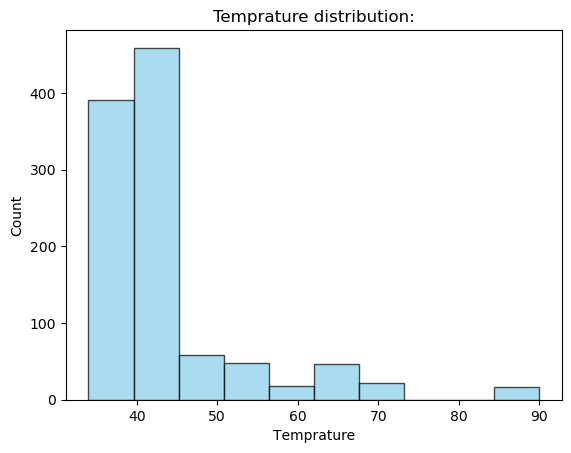

In [11]:
plt.hist(mq['Temprature'], bins=10, edgecolor='black', alpha=0.7, color='skyblue')
plt.title('Temprature distribution:')
plt.xlabel('Тemprature')
plt.ylabel('Count')
plt.show()


## От хистограмата виждаме, че температурата на млякото е най вече в диапазона от 34 до 45 градуса. Поддържането на подходящи температурни условия по време на производството, обработката и съхранението на млякото е от основно значение за постигане на високи стандарти за безопасност и качество на продукта.

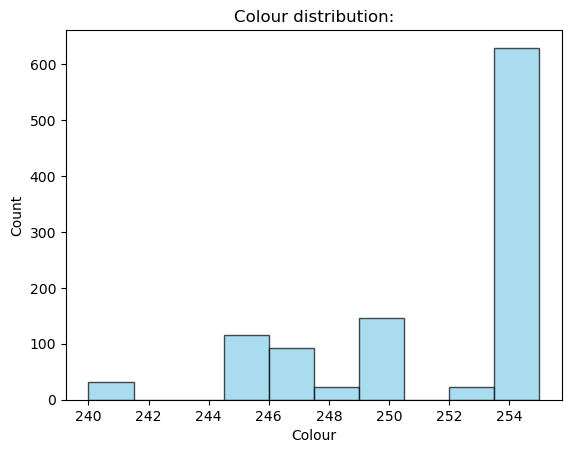

In [12]:
plt.hist(mq['Colour'], bins=10, edgecolor='black', alpha=0.7, color='skyblue')
plt.title('Colour distribution:')
plt.xlabel('Colour')
plt.ylabel('Count')
plt.show()

## Тук визуализираме колоната за цвят на млякото. Нейните стойности са от 240, което е леко сивеещо до 255, което е чисто бяло. Най-многобройна е стълбицата за цвят 254-255, което говори добре, но все пак има и приблизително 30 млека с по-тъмен цвят. Цветът на млякото често се определя от съдържанието на кератин и други пигменти в млечната маса. В общия случай, млякото има бял цвят, но този цвят може да варира в зависимост от различни фактори. Естествено мляко от добре поддържани и здрави крави често има по-богат и по-интензивен бял цвят.

## Ще разгледаме зависимостта между мътността на млякото при различните нива на pH в него
Мътността на млякото зависи от няколко фактора - физични, химични и бактериални аспекти. Важно е да се отбележи, че тя не винаги е индикация за проблем. Въпреки това, ако мътността на млякото е необичайна или асоциирана с неприятен вкус или мирис, може да бъде индикация за проблем в качеството на продукта.

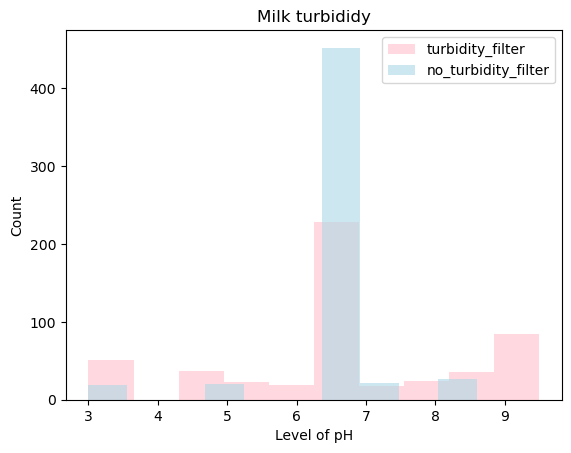

In [13]:
turbidity_filter = mq["Turbidity"] == 1
no_turbidity_filter = mq["Turbidity"] == 0

plt.hist(mq[turbidity_filter]["pH"], alpha=0.6, color='pink')
plt.hist(mq[no_turbidity_filter]["pH"], alpha=0.6, color='lightblue')

plt.xlabel('Level of pH')
plt.ylabel('Count')
plt.title("Milk turbididy")

plt.legend(['turbidity_filter',
            'no_turbidity_filter'])


plt.show()

## Можем да си извадим извод от хистограмата, че когата pH на млякото е между 6.30 и 6.90 или с други думи е в нормата си по голям брой млека са без мътност.

## Разпределение на вкуса на млякото
От значение са фактори като обработка и пастьоризация, стандартизация, здравето и храненето на животните и съхранение на млякото. 

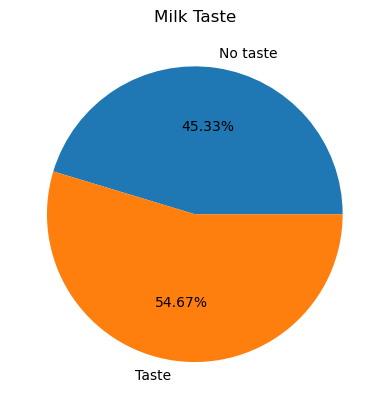

In [14]:
#Групиране на данните по вкусно и безвкусно мляко
milk_taste_count = mq.groupby('Taste').size()

milk_taste_count.index = ['No taste', 'Taste']

#Създаване на кръгова диаграма
plt.gca().set_aspect("equal")
plt.pie(milk_taste_count, labels = milk_taste_count.index, autopct = "%.2f%%")
plt.title("Milk Taste")
plt.show()

## От кръговата диаграма виждаме, че млеката, които имат вкус са 54.67%. Въпреки че тези които нямат вкус са по-малкият процент - 45.33%, все пак трябва да се обърне повече внимание в тази област и да се намали "лошият" процент.

In [15]:
mq = mq.drop('Grade', axis=1)

In [16]:
mq.corr()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
pH,1.000000,0.244684,-0.064053,-0.081331,-0.093429,0.048384,-0.164565
Temprature,0.244684,1.000000,-0.109792,-0.048870,0.024073,0.185106,-0.008511
Taste,-0.064053,-0.109792,1.000000,0.017582,0.324149,0.055755,-0.082654
Odor,-0.081331,-0.048870,0.017582,1.000000,0.314505,0.457935,-0.039361
Fat,-0.093429,0.024073,0.324149,0.314505,1.000000,0.329264,0.114151
Turbidity,0.048384,0.185106,0.055755,0.457935,0.329264,1.000000,0.136436
Colour,-0.164565,-0.008511,-0.082654,-0.039361,0.114151,0.136436,1.000000


### Най-изразителната връзка е между вкуса и миризмата, където стойността на корелацията е 0.324149, подчертавайки умерено силна положителна връзка. Това може да подчертае, че образуването на вкуса и миризмата са тясно свързани аспекти в измерванията.

### Освен това, има слаби отрицателни връзки между pH и вкуса, както и между pH и мазнините, сочейки, че по-ниският pH може да бъде свързан с по-интензивен вкус и по-ниско съдържание на мазнини.

### Също така, цветът на продукта се оказва отрицателно корелиран с pH, коетоn говори, че по-ниcкият pH често е асоцииран с по-ярки цветове.

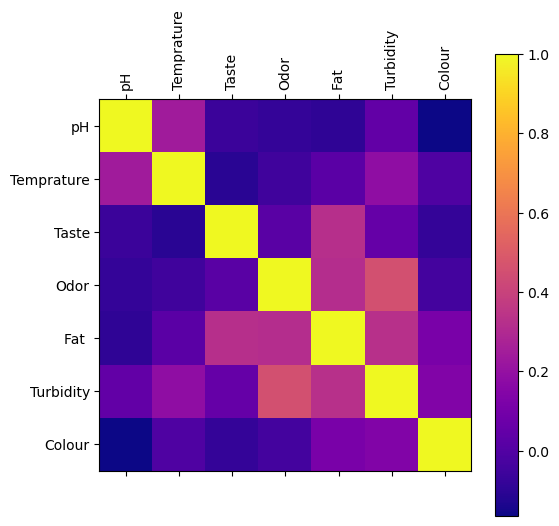

In [17]:
def plot_corr(dataframe, size=6):

    corr = dataframe.corr()

    fig, ax = plt.subplots(figsize=(size, size))
    cax = ax.matshow(corr, cmap='plasma')
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)

#Добавяне на цветната легенда
    plt.colorbar(cax)

plot_corr(mq)
plt.show()

### Предоставената функция plot_corr в Python е предназначена за създаване и показване на топлинна карта на корелационната матрица за даден DataFrame. Тя използва библиотеката Matplotlib за визуализация на данните. Визуализацията включва следните стъпки:
1. Изчислява се корелационната матрица чрез метода .corr().
2. Създава се фигура с размер, определен от параметъра size.
3. Цветовете визуално представят силата и посоката на корелациите.
4. Анотациите в топлинната карта представляват стойностите на корелационната матрица.
5. Крайният резултат се показва чрез plt.show().

In [18]:
# Втори начин за начертаване на корелационна матрица
corr = mq.corr()
corr.style.background_gradient(cmap = 'plasma')

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
pH,1.000000,0.244684,-0.064053,-0.081331,-0.093429,0.048384,-0.164565
Temprature,0.244684,1.000000,-0.109792,-0.048870,0.024073,0.185106,-0.008511
Taste,-0.064053,-0.109792,1.000000,0.017582,0.324149,0.055755,-0.082654
Odor,-0.081331,-0.048870,0.017582,1.000000,0.314505,0.457935,-0.039361
Fat,-0.093429,0.024073,0.324149,0.314505,1.000000,0.329264,0.114151
Turbidity,0.048384,0.185106,0.055755,0.457935,0.329264,1.000000,0.136436
Colour,-0.164565,-0.008511,-0.082654,-0.039361,0.114151,0.136436,1.000000


In [19]:
#Изчисляване на корелациите
correlations = mq.corr()

#Намиране на индексите на силно корелираните колони
highly_correlated = set()
for i in range(len(correlations.columns)):
    for j in range(i):
        if abs(correlations.iloc[i, j]) > 0.8:
            colname = correlations.columns[i]
            highly_correlated.add(colname)

#Премахване на силно корелираните колони от DataFrame
mq_filtered = mq.drop(columns=highly_correlated)

In [20]:
mq_filtered.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
0,6.6,35,1,0,1,0,254
1,6.6,36,0,1,0,1,253
2,8.5,70,1,1,1,1,246
3,9.5,34,1,1,0,1,255
4,6.6,37,0,0,0,0,255


In [21]:
mq_filtered['Taste'].unique()

array([1, 0], dtype=int64)

In [22]:
mq_filtered.dtypes

pH            float64
Temprature      int64
Taste           int64
Odor            int64
Fat             int64
Turbidity       int64
Colour          int64
dtype: object

#### Използваме ".dtypes" атрибута, за получаване на типовете данни на всяка колона от нашия поток от данни.

In [23]:
tasty = mq['Taste'].mean()
print(tasty)

0.546742209631728


#### Mетодът ".mean()" използваме, за да изчислим средната стойност на колоната "Вкус". Получаваме стойност, по-близка до единица, което се застъпва с горе показаната кръгова диаграма за вкусно и безвкусно мляко. Правим извод, че по-голяма част от млеката все пак имат вкус. 

In [24]:
Y = mq_filtered['Taste']

#### Присвояваме колоната "Вкус" на променливата Y

In [25]:
scaler = StandardScaler()

X = mq_filtered.drop('Taste',axis=1)

scaler.fit(X)
X_standard = scaler.transform(X)

#### "StandardScaler" се използва за стандартизиране на функции чрез премахване на средната стойност и мащабиране до дисперсия на единица. Това е съществена стъпка на предварителна обработка в много алгоритми за машинно обучение, особено тези, които са чувствителни към мащаба на входните характеристики.

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X_standard,Y,test_size=.2,random_state=123)

#### Функцията "train_test_split" е често използвана помощна програма от библиотеката scikit-learn. Използваме я, за да разделим набора от данни на набори за обучение и тестване за оценка на модела. Това е от решаващо значение, за да се оцени колко добре моделът на машинно обучение се обобщава към нови, невиждани данни.

In [27]:
X_train

array([[ 0.12142606, -0.31967094, -0.87296233,  0.69960809, -0.98221664,
         0.73386719],
       [ 1.40804285,  1.06734732,  1.1455248 ,  0.69960809,  1.01810533,
         0.73386719],
       [-0.09301007, -0.71596188, -0.87296233, -1.4293717 , -0.98221664,
        -1.58880273],
       ...,
       [ 2.05135125, -1.01318008,  1.1455248 , -1.4293717 ,  1.01810533,
         0.73386719],
       [ 0.55029833,  4.53489299, -0.87296233,  0.69960809,  1.01810533,
         0.73386719],
       [-0.02153136, -0.41874368, -0.87296233, -1.4293717 , -0.98221664,
         0.73386719]])

#### "X_train" съдържа функциите на набора.

In [28]:
Y_train

652     0
764     0
499     0
229     0
182     1
       ..
638     1
113     0
96      1
106     1
1041    1
Name: Taste, Length: 847, dtype: int64

#### "Y_train" съдържа съответните етикети за набора.

In [29]:
regresor = LogisticRegression(random_state=16)
regresor.fit(X_train, Y_train)

LogisticRegression(random_state=16)

#### Инициализиране и обучение на модела на логистична регресия

In [30]:
y_pred = regresor.predict(X_test)
 
accuracy = accuracy_score(Y_test, y_pred)
print("Logistic Regression model accuracy (in %):", accuracy*100)

Logistic Regression model accuracy (in %): 66.98113207547169


#### Използвайте модела, за да направим прогнози за нови данни и да оценим ефективността му върху тестовия набор

# Заключение

### Анализът на различните характеристики на млякото подчертава комплексността на влиянието им върху качеството на продукта. По-нататъшни изследвания и подобрения в производствените процеси могат да се фокусират върху оптимизирането на тези взаимодействия, с цел постигане на по-добри характеристики и удовлетворение на потребителите. Обобщавайки, разбирането на връзките между различните параметри може да бъде от съществено значение за подобряване на качеството на млякото и адаптиране на производствените практики.





